In [1]:
import face_recognition
import cv2
import tqdm

from scipy.io import loadmat


import matplotlib.pyplot as plt

In [2]:
scale_factor = 1    # how many factors to downsample frame prior to passing to detector
f_video = '../data/sample.mat'

data = loadmat(f_video)
images = data['image_record'].T

In [3]:
def find_and_blur(frame):
    # Find all the faces and face encodings in the current frame of video
    face_locations = face_recognition.face_locations(frame, model="cnn")
    
    # Display the results
    for top, right, bottom, left in face_locations:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        top *= scale_factor
        right *= scale_factor
        bottom *= scale_factor
        left *= scale_factor
    
        # Extract the region of the image that contains the face
        face_image = frame[top:bottom, left:right]
    
        # Blur the face image
        face_image = cv2.GaussianBlur(face_image, (99, 99), 30)
    
        # Put the blurred face region back into the frame image
        frame[top:bottom, left:right] = face_image
    return frame

In [4]:
if scale_factor > 1:
    # Resize frame of video to 1/scale_factor size for faster face detection processing
    small_frame1 = cv2.resize(images[0][0], (0, 0), fx=1/scale_factor, fy=1/scale_factor)
    small_frame2 = cv2.resize(images[0][-1], (0, 0), fx=1/scale_factor, fy=1/scale_factor)
else:
    small_frame1 = images[0][0]
    small_frame2 = images[0][-1]

In [5]:
print(small_frame1.shape)

(1080, 1920, 3)


In [9]:
blurred_frame=find_and_blur(small_frame1)  

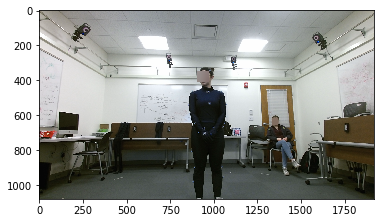

In [10]:
plt.imshow(blurred_frame)
plt.show()
